In [1]:
import tensorflow as tf
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt

tf.enable_eager_execution()
tf.__version__

/home/ssojux2/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ssojux2/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ssojux2/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ssojux2/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:5

'1.14.0'

## Dataset 준비

In [2]:
# Load training and eval data from tf.keras
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.mnist.load_data()

train_data = train_data / 255.
train_data = train_data.reshape(-1, 784)
train_data = train_data.astype(np.float32)
train_labels = train_labels.astype(np.int32)

test_data = test_data / 255.
test_data = test_data.reshape(-1, 784)
test_data = test_data.astype(np.float32)
test_labels = test_labels.astype(np.int32)

In [3]:
def one_hot_label(image, label):
  label = tf.one_hot(label, depth=10)
  return image, label

In [4]:
batch_size = 32
max_epochs = 10

# for train
N = len(train_data)
train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
train_dataset = train_dataset.shuffle(buffer_size=10000)
train_dataset = train_dataset.map(one_hot_label)
train_dataset = train_dataset.repeat().batch(batch_size=batch_size)
print(train_dataset)

# for test
test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_labels))
test_dataset = test_dataset.map(one_hot_label)
test_dataset = test_dataset.repeat().batch(batch_size=batch_size)
print(test_dataset)

<DatasetV1Adapter shapes: ((?, 784), (?, 10)), types: (tf.float32, tf.float32)>
<DatasetV1Adapter shapes: ((?, 784), (?, 10)), types: (tf.float32, tf.float32)>


label = 3


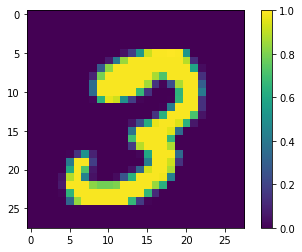

In [11]:
index = 12345
print("label = {}".format(train_labels[index]))
plt.imshow(train_data[index].reshape(28, 28))
plt.colorbar()
#plt.gca().grid(False)
plt.show()

# 모델 제작
## tf.keras.layers.Dense

```python
 def __init__(self,
               units,
               activation=None,
               use_bias=True,
               kernel_initializer='glorot_uniform',
               bias_initializer='zeros',
               kernel_regularizer=None,
               bias_regularizer=None,
               activity_regularizer=None,
               kernel_constraint=None,
               bias_constraint=None,
               **kwargs):
```

In [6]:
model = tf.keras.models.Sequential()

# Adds a densely-connected layer with 64 units to the model:
#model.add(layers.Dense(64, activation='relu'))
# Add another:
#model.add(layers.Dense(64, activation='relu'))
# Add a softmax layer with 10 output units:
model.add(layers.Dense(10, activation='softmax'))

# Training
## tf.keras.losses.CategoricalCrossentropy()

```python
cce = tf.keras.losses.CategoricalCrossentropy()
loss = cce([[1., 0., 0.], [0., 1., 0.], [0., 0., 1.]],
           [[.9, .05, .05], [.5, .89, .6], [.05, .01, .94]])
print('Loss: ', loss.numpy())  # Loss: 0.3239
```

In [7]:
model.compile(optimizer=tf.train.AdamOptimizer(1e-4),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [8]:
# without training, just inference a model in eager execution:
predictions = model(train_data[0:1], training=False)
print("Predictions: ", predictions.numpy())

Predictions:  [[0.05037052 0.05683051 0.11601464 0.14327353 0.04672761 0.25748473
  0.05184826 0.0630134  0.17149234 0.04294441]]


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [10]:
# using `numpy type` data
# history = model.fit(train_data, train_labels,
#                     batch_size=batch_size, epochs=max_epochs,
#                     validation_split=0.05)
# using `tf.data.Dataset`
history = model.fit(train_dataset, epochs=max_epochs,
                   steps_per_epoch=int(len(train_data) / batch_size))

W0829 11:28:58.287794 140010685892416 deprecation.py:323] From /home/ssojux2/.local/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1423 - acc: 0.5597
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5566 - acc: 0.8564
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4400 - acc: 0.8820
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3895 - acc: 0.8938
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3616 - acc: 0.9010
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3437 - acc: 0.9062
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3310 - acc: 0.9088
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3215 - acc: 0.9109
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3140 - acc: 0.9139
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3080 - acc: 0.9141


In [11]:
history.history.keys()

dict_keys(['loss', 'acc'])

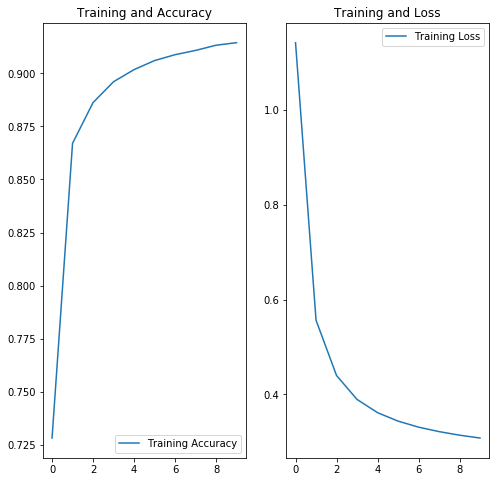

In [12]:
acc = history.history['acc']

loss = history.history['loss']

epochs_range = range(max_epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training and Loss')
plt.show()

In [13]:
results = model.evaluate(test_dataset, steps=int(len(train_data) / batch_size))

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2964 - acc: 0.9177


In [14]:
# loss
print("loss value: {:.3f}".format(results[0]))
# accuracy
print("accuracy value: {:.4f}%".format(results[1]*100))

loss value: 0.296
accuracy value: 91.7700%


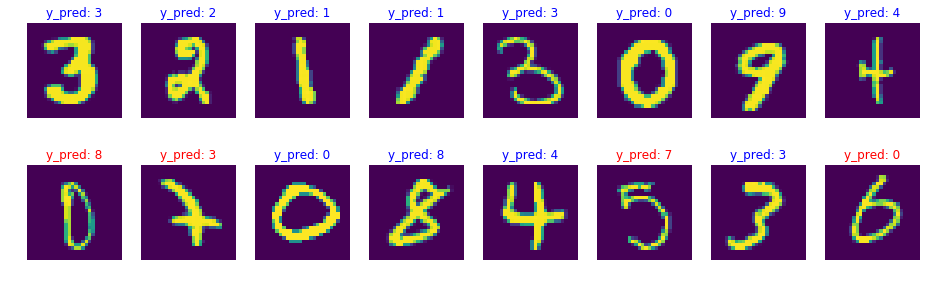

In [15]:
np.random.seed(219)
test_batch_size = 16
batch_index = np.random.choice(len(test_data), size=test_batch_size, replace=False)

batch_xs = test_data[batch_index]
batch_ys = test_labels[batch_index]
y_pred_ = model(batch_xs, training=False)

fig = plt.figure(figsize=(16, 10))
for i, (px, py) in enumerate(zip(batch_xs, y_pred_)):
  p = fig.add_subplot(4, 8, i+1)
  if np.argmax(py) == batch_ys[i]:
    p.set_title("y_pred: {}".format(np.argmax(py)), color='blue')
  else:
    p.set_title("y_pred: {}".format(np.argmax(py)), color='red')
  p.imshow(px.reshape(28, 28))
  p.axis('off')